# Data Story

In [1]:
# package imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('ggplot')

## Import clean DataFrames from 2.0-jkg-data-wrangling

In [2]:
# import pickle files
df_clean = pd.read_pickle('../data/interim/clean_df.pickle')
df_patients = pd.read_pickle('../data/interim/patients_df.pickle')
df_appointments = pd.read_pickle('../data/interim/appointments_df.pickle')

**Counts (Appointments per Patient)**

The records in this dataset represent specific appointments, not just individual patients. There may be redundant data which is really patient level data that is contained in the appointment level dataset. To start investigating this, it will be helpful to get a general sense of how many appointments the average patient has in our dataset.

In [3]:
# use df_appointments
appointments_per_patient = df_appointments.groupby('Patient_ID').size().reset_index(name='appointment_count').set_index('Patient_ID')

# display summary stats for appointments per patient
appointments_per_patient.describe()

,appointment_count
count,62299.000000
mean,1.774138
std,1.770324
min,1.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,88.000000


It looks like the majority of our patients have only 1 appointment, but there are several patients with multiple appointments.

**Bar Plot (Appointments per Day of Week)**

Having an idea of how appointments are spread out throughout the week will provide some context for the data and how appointments are scheduled in these clinics. If, for example, there were no appointments scheduled on a specific day, that might indicate that we either have some missing data or the clinic is closed on that day, which might have implications for appointments on the surrounding weekdays.

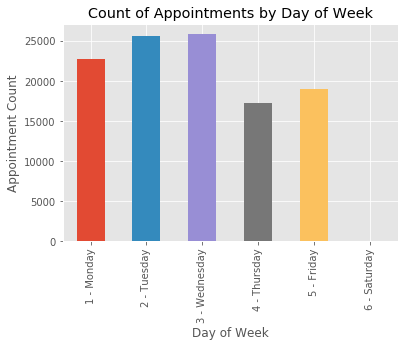

In [4]:
# dict for day of week
day_of_week = {0: '1 - Monday',
               1: '2 - Tuesday',
               2: '3 - Wednesday',
               3: '4 - Thursday',
               4: '5 - Friday',
               5: '6 - Saturday',
               6: '7 - Sunday'}

_ = df_appointments.Appointment_Date.dt.dayofweek.replace(to_replace=day_of_week).value_counts().sort_index().plot(kind='bar', title='Count of Appointments by Day of Week')
_ = plt.xlabel('Day of Week')
_ = plt.ylabel('Appointment Count')

Most appointments are clustered in the beginning of the week, with the least coming on Thursday followed by Friday. This may just be representative of the scheduling practices of the clinics, or it could indicate that our dataset ends on a Wednesday.

**Histogram (Patients by Age)**

Getting an overall sense of the age distribution of the patients in our dataset provides context for the patient population at these clinics.

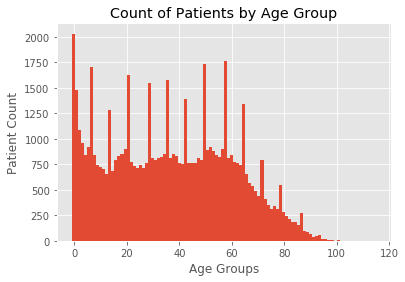

In [5]:
_ = df_clean.groupby('Patient_ID').Age.agg('max').plot.hist(bins=100, title='Count of Patients by Age Group')
_ = plt.xlabel('Age Groups')
_ = plt.ylabel('Patient Count')

By increasing the number of bins in this histogram, we are seeing age groups of roughly one year. The regular spikes in patient counts indicates that ages in our dataset may have been rounded, and are not entirely accurate.

**Comparison (Percent of Patients by Gender vs Percent of Appointments by Gender)**

It would be helpful to know if males and females schedule appointments at a rate representative of the patient population, or if one gender schedules appointments at a higher rate than the other. For example, a higher number of appointments by females could indicate that many of the appointments are for pregnancy-related visits.

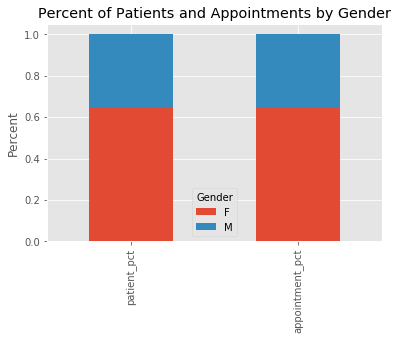

In [6]:
gender_patients = df_patients.groupby('Gender').size().reset_index(name='patient_count').set_index('Gender')
gender_appointments = df_appointments.groupby('Gender').size().reset_index(name='appointment_count').set_index('Gender')

gender_counts = gender_patients.merge(gender_appointments, left_index=True, right_index=True)

gender_counts['patient_pct'] = gender_counts['patient_count'] / gender_counts['patient_count'].sum()
gender_counts['appointment_pct'] = gender_counts['appointment_count'] / gender_counts['appointment_count'].sum()

_ = gender_counts[['patient_pct', 'appointment_pct']].transpose().plot(kind='bar', stacked=True, title='Percent of Patients and Appointments by Gender')
_ = plt.ylabel('Percent')


The ratio of males to females is nearly identical for both patients and appointments, meaning there is no significant difference between the genders in how many appointments they have.

**Time Series Plot (Appointments by Date)**

Lastly, it would be helpful to get a general overview of the timeline of our data. A simple line plot showing the number of appointments over time will help give some context.

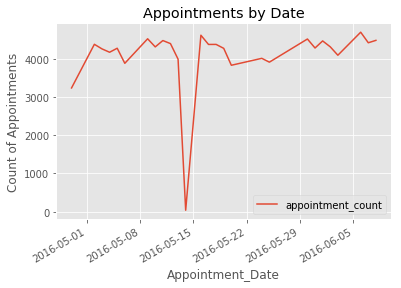

In [7]:
appointments_by_date = df_appointments.groupby('Appointment_Date').size().reset_index(name='appointment_count').set_index('Appointment_Date')

_ = appointments_by_date.plot(title='Appointments by Date')
_ = plt.ylabel('Count of Appointments')

Interestingly, there is a dramatic drop off around June 15th. If this was a holiday, or some other major event, that could have implications for appointments on surrounding dates.